# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Цель** Ознакомиться  и изучить общую информацию данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', None)
data.head() #вывода данных и посмтреть структуру таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info() #Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
print(data.isna().sum()) #проверка пропусков 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [5]:
print(data.describe()) #проверка значении в стобцах min max среднее 

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

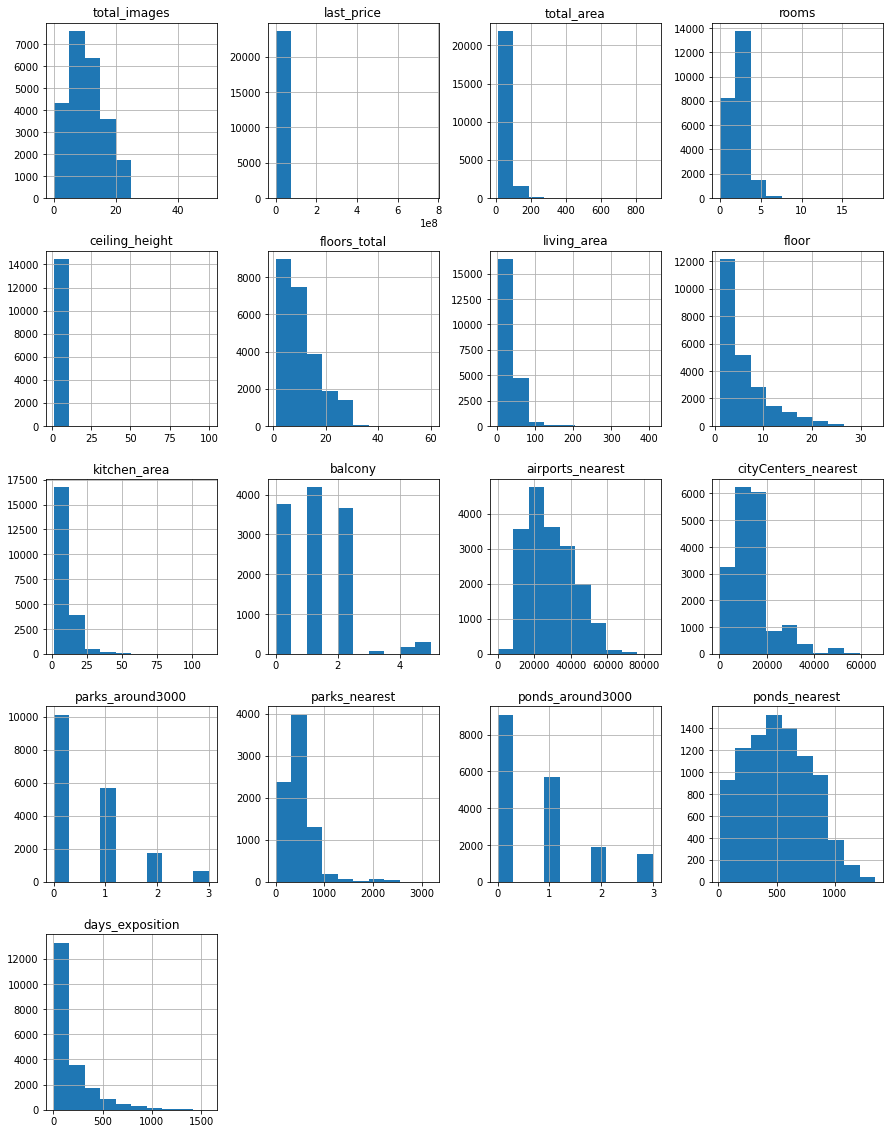

In [6]:
data.hist(figsize=(15, 20)); #проверка однородности до изменении 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

**Общая информация:** 
* **Количество строк:** 23699
* **Количество столбцов:** 22
* **Минимальное и максимальное значения:** есть аномалии и выбросы в столбцах ceiling_height и living_area, kitchen_area. 
* **Наличие отрицательных значений:** аномалии нет
* **Есть пропущенные значение в столбцах, которые нужно обработать после анализа.**
* **Изменить формат столбцов first_day_exposition из object на datetime b
floors_total из float64 на int64(целое число)** 

### Предобработка данных

#### 2.1. Анализ и обработка пропущенных значении

* **Цель** Предобработать и подготовить данные для корректного анализа
* **Описание** Для анализа и однородности данных требуется заполнить пропущенные значения, исключить анмоалии и выбросы, которые искажают общую статистику 

100.0
2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64
count    23699.000000
mean         2.693220
std          0.204351
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64


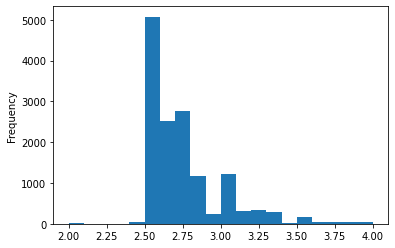

In [7]:
print(data['ceiling_height'].max()) #есть выбросы и аномальные значения
print(data['ceiling_height'].value_counts(normalize=False))
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 20, range=(2,4))
#выявление медианного значения 
median_ceiling = data['ceiling_height'].median()
#заполнение пропуски
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling)
lower_threshold = 2.0  # минимально значение
upper_threshold = 4.0  # максимально значение 

# заменяю аномальные значения, согласно среднестатисической нормы
data.loc[data['ceiling_height'] < lower_threshold, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] > upper_threshold, 'ceiling_height'] = data['ceiling_height'].median()
# проверка изменений
print(data['ceiling_height'].describe())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

count    23699.000000
mean        32.257646
std         14.867837
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max         90.000000
Name: living_area, dtype: float64
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


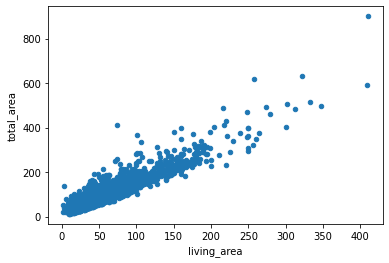

In [8]:
# визуализация данных перед обработкой
data.plot(x='living_area', y='total_area', kind='scatter')
# замена пропущенных значений 
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
# проверка на отрицательные значения 
data.loc[data['living_area'] < 0, 'living_area'] = data['living_area'].median()
# обработка выбросов
lower_living_area = 2.0
upper_living_area = 90.0
data.loc[data['living_area'] < lower_living_area, 'living_area'] = data['living_area'].median()
data.loc[data['living_area'] > upper_living_area, 'living_area'] = data['living_area'].median()
# проверка изменений
print(data['living_area'].describe())
print(data.isna().sum())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

In [9]:
#kitchen_pivot = data.pivot_table(index='total_area', values='kitchen_area', aggfunc='median')
#kitchen_pivot.columns = ['median_kitchen_area']
#kitchen_pivot['total_area'] = kitchen_pivot.index
lower_kitchen_area = 2.0  
upper_kitchen_area = 30.0  

# замена аномальных значений
data.loc[data['kitchen_area'] < lower_kitchen_area, 'kitchen_area'] = data['kitchen_area'].median()
data.loc[data['kitchen_area'] > upper_kitchen_area, 'kitchen_area'] = data['kitchen_area'].median()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
print(data.isna().sum())
print(data['kitchen_area'].describe())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
count    23699.000000
mean        10.012713
std          4.493347
min          2.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         83.458769
Name: kitchen_area, dtype: float64


In [10]:
#заполнение пропусков и меняем тип  
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#заполнение пропусков, не критично но визуально легче смотреть
data['balcony'] = data['balcony'].fillna(0)
#заполнение пропусков, не критично но визуально легче смотреть
data['is_apartment'] = data['is_apartment'].fillna(value=False)
#заполнение пропусков, не критично но визуально легче смотреть
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['parks_nearest'] = data['parks_nearest'].fillna(value=0)
#заполнение пропусков, не критично но визуально легче смотреть
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=0)
#заполнение пропусков, не критично но визуально легче смотреть
data['airports_nearest'] = data['airports_nearest'].fillna(value=0)
#заполнение пропусков, не критично но визуально легче смотреть
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=0)

In [11]:
replace_dict = {
    'поселок городского типа': 'поселок',
    'посёлок': 'поселок'
}

data['locality_name'] = data['locality_name'].replace(replace_dict, regex=True)
print(data['locality_name'].unique())


['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор'
 'Гатчина' 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой'
 'поселок городского типа Лебяжье' 'поселок городского типа Сиверский'
 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры' '

In [12]:
print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64


In [13]:
# Last_price
price_anomalies = data[data['last_price'] > 1000000000]
price_anomalies_count = price_anomalies.shape[0]
price_anomalies_per = price_anomalies_count / data.shape[0] * 100

#rooms
rooms_anomalies = data[data['rooms'] > 10]
rooms_anomalies_count = rooms_anomalies.shape[0]
rooms_anomalies_per = rooms_anomalies_count / data.shape[0] * 100

#total_area
area_anomalies = data[data['total_area'] > 300]
area_anomalies_count = area_anomalies.shape[0]
area_anomalies_per = area_anomalies_count / data.shape[0] * 100

# Вывод результатов
print("Кол-во аномалий last_price:", price_anomalies_count)
print("Процент аномалий last_price:", price_anomalies_per)
print("Кол-во аномалий rooms:", rooms_anomalies_count)
print("Процент аномалий rooms:", rooms_anomalies_per)
print("Кол-во аномалий total_area:", area_anomalies_count)
print("Процент аномалий total_area:", area_anomalies_per)

Кол-во аномалий last_price: 0
Процент аномалий last_price: 0.0
Кол-во аномалий rooms: 8
Процент аномалий rooms: 0.03375669859487742
Кол-во аномалий total_area: 61
Процент аномалий total_area: 0.25739482678594033


 **Вывод**
1.  Наибольшие пропуски в столбцах ceiling_height, is_apartment, balcony - предположительно столбцы ввели недавно. Все пропущенные значения обработаны
2.  В столбцах kitchen_area и living_area есть пропуски и выбросы. Заполнила медианным зшачением пропуски, основаным на соотношении этих площадей к общей площади. Обработала аномалии в значениях установив среднестатистическую площад в предлах нормы
3.  Заполнила второстепенные пропуски в столбцах, которые не нужны для анализа 
4.  Заменила неявные дубликаты в locality_name
5.  Требуется автоматизировать ввод/заполнения данных, установить пределы и нормы 

### Посчитайте и добавьте в таблицу новые столбцы

* **Цель** Добавить новые столбцы для информативности и полезности 

1.  цена одного квадратного метра
2.  день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
3.  месяц публикации объявления
4.  год публикации объявления
5.  тип этажа квартиры (значения — «первый», «последний», «другой»)
6.  расстояние в км до центра города


In [14]:
#цена одного квадратного метра
data['price_psm'] = data['last_price'] / data['total_area']

In [15]:
#день публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month
#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [16]:
#функция для сошдания категории
def category_for_floor(level, floors_total):
    try:
        if level == 1:
            return 'первый'
        elif level == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'другой'
#добавление столбца и присвоение категории 
data['floor_category'] = data.apply(lambda x: category_for_floor(x['floor'], x['floors_total']), axis=1)

In [17]:
#расстояние в км до центра города
data['distance_to_center'] = data['cityCenters_nearest'] // 1000
print(data.describe())

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    23699.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.693220   
std        5.682529  1.088701e+07     35.654083      1.078405        0.204351   
min        0.000000  1.219000e+04     12.000000      0.000000        2.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.600000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.700000   
max       50.000000  7.630000e+08    900.000000     19.000000        4.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  23699.000000  23699.000000  23699.000000  23699.000000   
mean      10.673824     32.257646      5.892358     10.012713      0.591080   
std        6.597173     14.867837

### Проведите исследовательский анализ данных

#### **Изучены и описаны следующие параметры**
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

##### **Вывод**
**Общая площадь**
- Пик значении в диапозоне 40-60 кв.м. Это соответствует стандартным планировкам или предпочтениям покупателей в отношении размеров жилья.
Также есть редкие выбросы, с большими значениями общей площади, что может быть связано с типом жилья коммерческая недвижимость и т.п.

**Жилая площадь**
- Пик в диапазоне 30-45 кв.м, что может указывать на наличие типичных значений. Это соответствует стандартным планировкам

**Площадь кухни**
- Пик в диапазоне 5-10 кв.м, что может указывать на наличие типичных значений. Это соответствует стандартным планировкам

**Количество комнат**
- Популярностью пользуются 1-2 комнаты. Думаю из-за доступности в цене 

**Высота потолков**
- Наблюдается пик в диапазоне 2.5-3.0 метра, что может указывать на наличие типичных значений высоты потолков. Выбросы могут указовать на тип жилья как историческое здание или на особенность жилья.

**Тип этажа квартиры («первый», «последний», «другой»)**
- Распрастранено покупать жилье покупать с типом "другой". 

**Общее количество этажей в доме**
- Пик в диапазоне 5-25 этажей, что указывает на наличие типичных значений количества этажей в доме

**Расстояние до центра города в метрах**
- Наиболее распространенное расстояние составляет около 10 км

**День и месяц публикации объявления**
- Пик популярности размещения это будни дня на летний период 

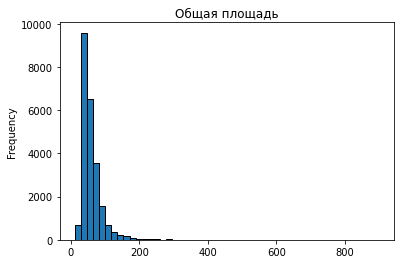

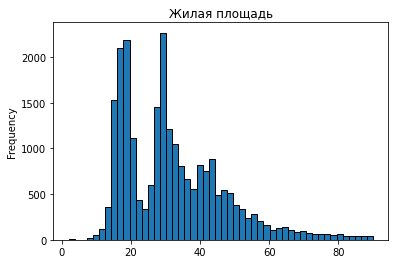

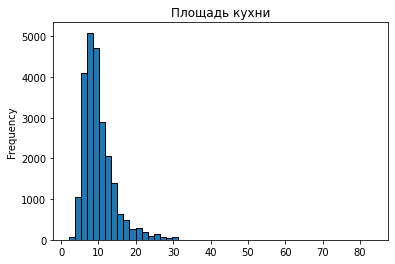

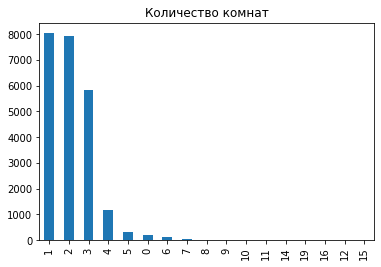

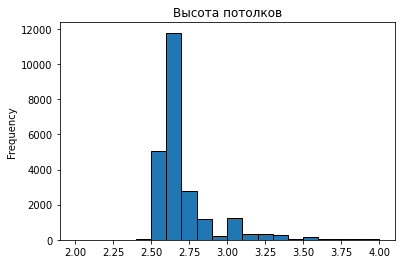

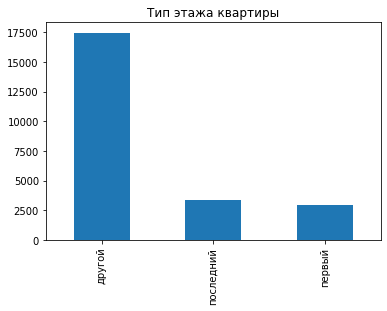

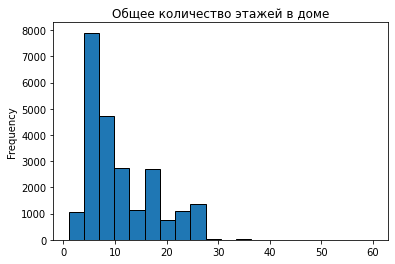

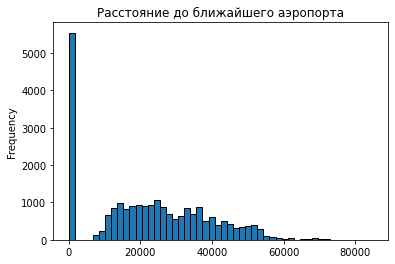

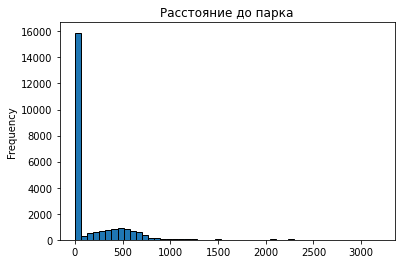

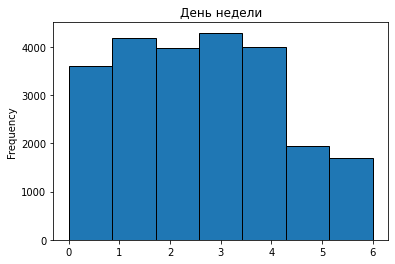

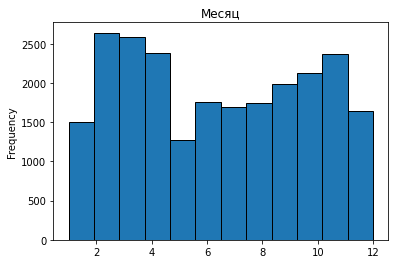

In [18]:
#Общая площадь
data['total_area'].plot(title='Общая площадь', kind='hist', bins=50, edgecolor='black')
plt.show()
#Жилая площадь
data['living_area'].plot(title='Жилая площадь', kind='hist', bins=50, edgecolor='black')
plt.show()
#Площадь кухни
data['kitchen_area'].plot(title='Площадь кухни', kind='hist', bins=50, edgecolor='black')
plt.show()
# Количество комнат
data['rooms'].value_counts().plot(kind='bar', title='Количество комнат')
plt.show()
# Высота потолков
data['ceiling_height'].plot(title='Высота потолков', kind='hist', bins=20, edgecolor='black')
plt.show()
# Тип этажа квартиры
data['floor_category'].value_counts().plot(kind='bar', title='Тип этажа квартиры')
plt.show()
# Общее количество этажей в доме
data['floors_total'].plot(title='Общее количество этажей в доме', kind='hist', bins=20, edgecolor='black')
plt.show()
#Расстояние до ближайшего аэропорта
data['airports_nearest'].plot(kind='hist', bins=50, edgecolor='black', title='Расстояние до ближайшего аэропорта')
plt.show()
# Расстояние до ближайшего парка
data['parks_nearest'].plot(kind='hist', bins=50, edgecolor='black', title='Расстояние до парка')
plt.show()
# День публикации объявления
data['weekday'].plot(kind='hist', bins=7, edgecolor='black', title='День недели')
plt.show()
# Месяц публикации объявления
data['month'].plot(title = 'Месяц',kind='hist', bins=12, edgecolor='black')
plt.show()


#### **Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.**
* Постройте гистограмму.
* Посчитайте среднее и медиану.
* В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

Средняя длительность продажи: 180 дней
Медианная длительность продажи: 95 дней


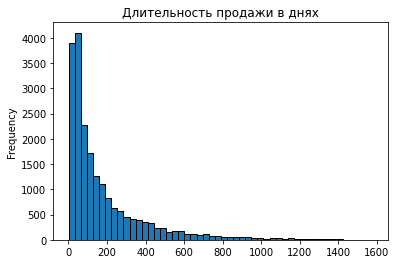

In [19]:
data['days_exposition'].plot(kind='hist', bins=50, edgecolor='black', title = 'Длительность продажи в днях')
mean_days_exposition = data['days_exposition'].mean().astype(int)
median_days_exposition = data['days_exposition'].median().astype(int)
print('Средняя длительность продажи:', mean_days_exposition, 'дней')
print('Медианная длительность продажи:', median_days_exposition, 'дней')


* **Быстрые продажи:** Продажи, которые были проданы в течение первых 30-60 дней, можно считать быстрыми продажами. Это указывает на выгодное предложение и интерес покупателей 
* **Оьычные продажи:**  Продажи, которые происходят в диапазоне средней и медианной длительности (~95-180 дней), можно считать обычными. Это типичное время, необходимое для продажи недвижимости на данном рынке
* **Необычно долгие продажи:** Если объявление о продаже "висит" на рынке значительно дольше медианной длительности (более ~180 дней), можно считать такую продажу необычно долгой. Это может указывать на сложности в продаже недвижимости из-за непривлекательной цены, непопулярного района или проблемы самим обьектом

#### **Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.**
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);


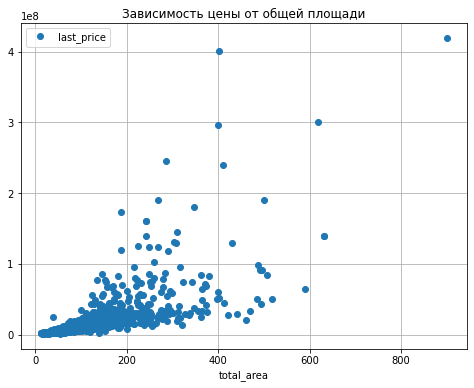

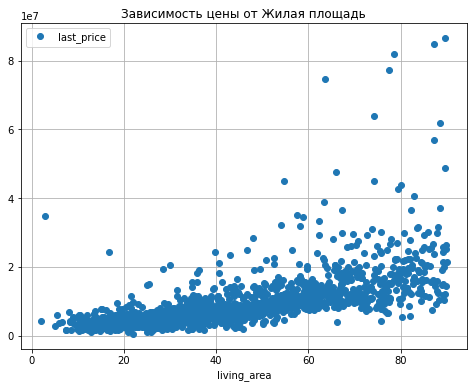

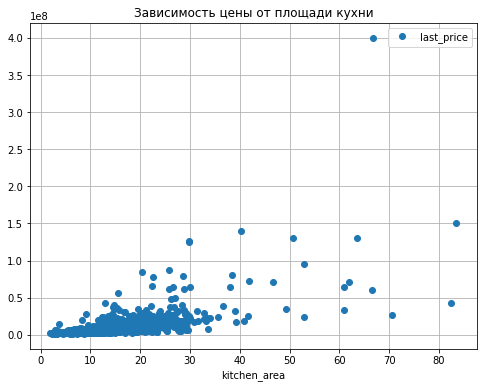

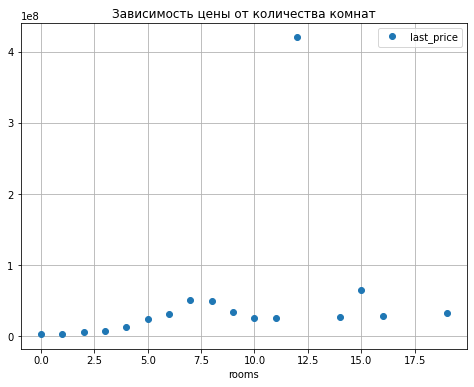

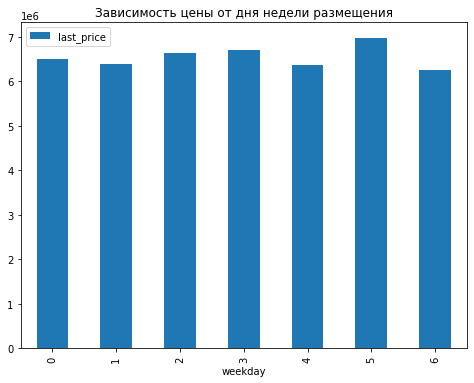

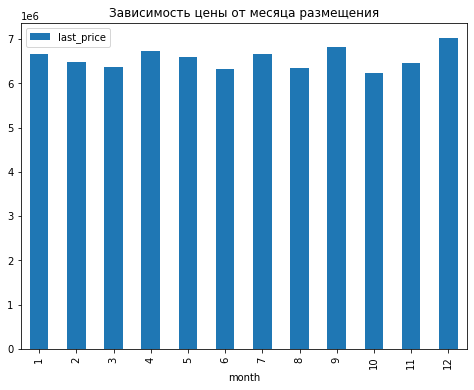

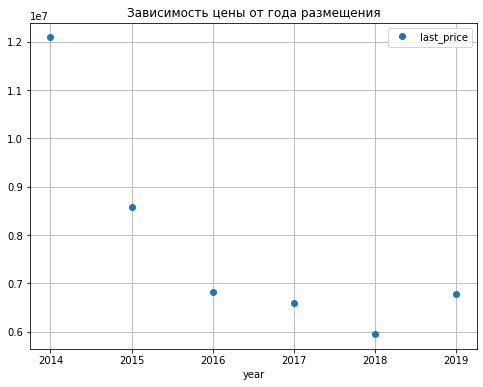

In [20]:
# зависимость цены от общей площади
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(8, 6), title = 'Зависимость цены от общей площади')
plt.show()
# Зависимость цены от жилой площади
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(8, 6), title = 'Зависимость цены от Жилая площадь')
plt.show()
# Зависимость цены от площади кухни
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(8, 6), title ='Зависимость цены от площади кухни')
plt.show()
# Зависимость цены от количества комнат
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o', figsize=(8, 6), title='Зависимость цены от количества комнат')
plt.show()

# Зависимость цены от даты размещения (день недели)
data.pivot_table(index='weekday', values='last_price').plot(kind='bar', figsize=(8, 6), title='Зависимость цены от дня недели размещения')
plt.show()

# Зависимость цены от даты размещения (месяц)
data.pivot_table(index='month', values='last_price').plot(kind='bar', figsize=(8, 6), title='Зависимость цены от месяца размещения')
plt.show()

# Зависимость цены от даты размещения (год)
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o', figsize=(8, 6),title='Зависимость цены от года размещения' )
plt.show()


Общие выводы:

- Общая площадь: Чем больше площадь, тем выше цена объекта.

- Жилая площадь: Квартиры с большей жилой площадью обычно имеют более высокую стоимость.

- Площадь кухни: Большая площадь кухни повышает стоимость объекта

- Количество комнат: Квартиры с большим количеством комнат обычно стоят дороже.

- Тип этажа: Квартиры на первом этаже обычно имеют более низкую цену

- День недели размещения: Объявления о продаже не оказывает значительного влияния на цену.

- Месяц размещения:Сезонность влияет на спрос на недвижимость.

- Год размещения: 2015 году был пик продаж жилья, возможно, влияет общее положение в экономике.

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.**

In [22]:
#10 населенных пунктов с наибольшим числом объявлений
top_localities = data['locality_name'].value_counts().head(10).index.tolist()
#Расчет средней цены за кв.метр
average_price= data[data['locality_name'].isin(top_localities)].groupby('locality_name')['last_price'].mean()
#Населенные пункты с самой высокой и низкой стоимостью квадратного метра
highest_price = average_price.idxmax()
lowest_price = average_price.idxmin()

print("Самая высокая стоимость: ", highest_price)
print("Самая низкая стоимость: ", lowest_price)

Самая высокая стоимость:  Санкт-Петербург
Самая низкая стоимость:  Выборг


**Вывод**
- Самая высокая стоимость квадратного метра в Санкт-Петербуре.Это может быть связано с престижностью, инфраструктурой и другими факторами, которые делают этот населенный пункт более привлекательным для покупателей
- Самая низкая стоимость квадратного метра в селе/деревне Выборг. Который имеет низкую стоимость за квадратный метр

**Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

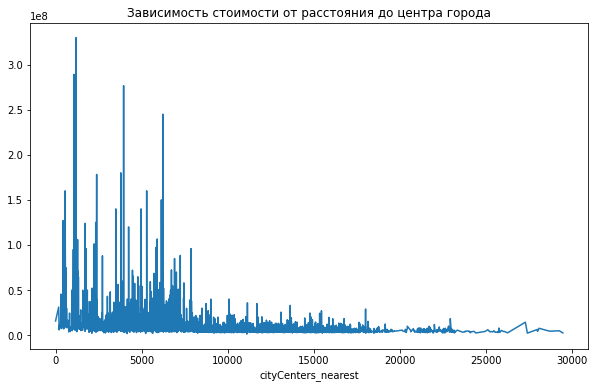

In [23]:
spb_data = data[data['locality_name'] == 'Санкт-Петербург'].copy() # использовала метод .copy(), что бы затронуть исходные данные
# Расчет средней цены и группировка по расстоянию 
mean_price = spb_data.groupby('cityCenters_nearest')['last_price'].mean()

mean_price.plot(kind='line', figsize=(10, 6), title = 'Зависимость стоимости от расстояния до центра города')
plt.show()




**Вывод:**

- Cтоимость жилья снижается по мере удаления от центра города. Это может быть связано с тем, что ближе к центру расположены более престижные районы с удобствами.

### Общий вывод

В ходе анализа данных недвижимости были выполнены несколько задач, включая:

- Предобработку и исправление данных после анализа.
- Изучение времени продажи квартир.
- Анализ факторов, влияющих на стоимость объектов.
- Изучение зависимости стоимости от расстояния до центра города.

В результате анализа времени продажи квартир было установлено, что большинство объявлений о продаже закрываются в течение 100 дней. Медианное значение составляет около 95 дней, что можно считать нормальным временем продажи. Квартиры, продажа которых занимает менее 45 дней, можно считать быстрыми, а продажи, превышающие 180 дней, можно считать необычно долгими.

При анализе зависимости стоимости от расстояния до центра города было выяснено, что в центре города цены на недвижимость выше, а по мере удаления от центра цены снижаются.

Также было выявлено, что для определения рыночной стоимости недвижимости важными факторами являются местность, общая площадь, количество комнат, расположение от центра и тип жилья.

Эти результаты могут быть полезными для агентств недвижимости, потенциальных покупателей и для изучения рынка продаж недвижимости. **Рекомендуется** автоматизировать ввод и заполнение данных, установить пределы и нормы, чтобы избежать ручных ошибок, которые могут исказить общую статистику и показатели.